In [2]:
from data_loaders import load_and_merge

merged_df = load_and_merge()

In [3]:
merged_df.head()

,Namespace,Incident ID,Published,Risk Domain,Risk Subdomain,Entity,Timing,Intent,_id,incident_id,date,reports,Alleged deployer of AI system,Alleged developer of AI system,Alleged harmed or nearly harmed parties,description,title
26,MIT,27,True,"7. AI system safety, failures, and limitations",7.3. Lack of capability or robustness,Human,Post-deployment,Unintentional,ObjectId(625763df343edc875fe63a19),27,1983-09-26,"[342,343,344,345,346,347,349,350,351,352,353,3...","[""soviet-union""]","[""soviet-union""]","[""all-life-on-earth""]",An alert of five incoming intercontinental bal...,Nuclear False Alarm
370,MIT,379,True,"7. AI system safety, failures, and limitations",7.3. Lack of capability or robustness,Human,Post-deployment,Unintentional,ObjectId(636218985a33233a22f6632e),379,1992-05-25,"[2179,2180]","[""pepsi""]","[""d.g.-consultores""]","[""filipinos""]",Pepsi's number generation system determining d...,Error in Pepsi's Number Generation System Led ...
41,MIT,42,True,5. Human-Computer Interaction,5.2. Loss of human agency and autonomy,Human,Pre-deployment,Intentional,ObjectId(625763e0343edc875fe63a28),42,1996-04-03,"[759,2471]","[""national-resident-matching-program""]","[""national-resident-matching-program""]","[""medical-residents""]","Alvin Roth, a Ph.D at the University of Pittsb...",Inefficiencies in the United States Resident M...
42,MIT,43,True,1. Discrimination and Toxicity,1.1. Unfair discrimination and misrepresentation,AI,Post-deployment,Unintentional,ObjectId(625763e0343edc875fe63a29),43,1998-03-05,"[762,763,764,765]","[""st-george's-hospital-medical-school""]","[""dr.-geoffrey-franglen""]","[""women"",""minority-groups""]","From 1982 to 1986, St George's Hospital Medica...",Racist AI behaviour is not a new problem
78,MIT,79,True,1. Discrimination and Toxicity,1.3. Unequal performance across groups,Human,Post-deployment,Unintentional,ObjectId(625763e4343edc875fe63a4d),79,1999-03-16,"[1379,1736,2039]","[""chronic-kidney-disease-epidemiology-collabor...","[""chronic-kidney-disease-epidemiology-collabor...","[""black-patients"",""african-american-patients""]",Decades-long use of the estimated glomerular f...,Kidney Testing Method Allegedly Underestimated...


/Users/user/Documents/AI/AI Incidents Forecasting/ai-incident-forecasting/src/forecast_helpers.py:228: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d.groupby(["__year", "__cat"])["__val"]
/Users/user/Documents/AI/AI Incidents Forecasting/ai-incident-forecasting/src/forecast_helpers.py:237: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d.groupby([pd.Grouper(key=date_col, freq="MS"), "__cat"])["__val"]
/opt/miniconda3/envs/ai_incident_forecasting/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then 

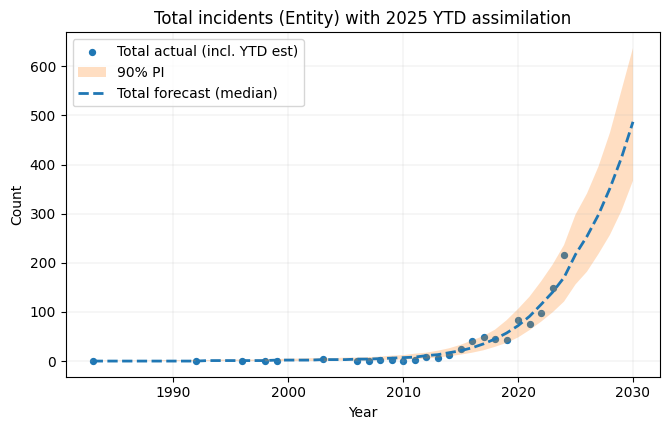

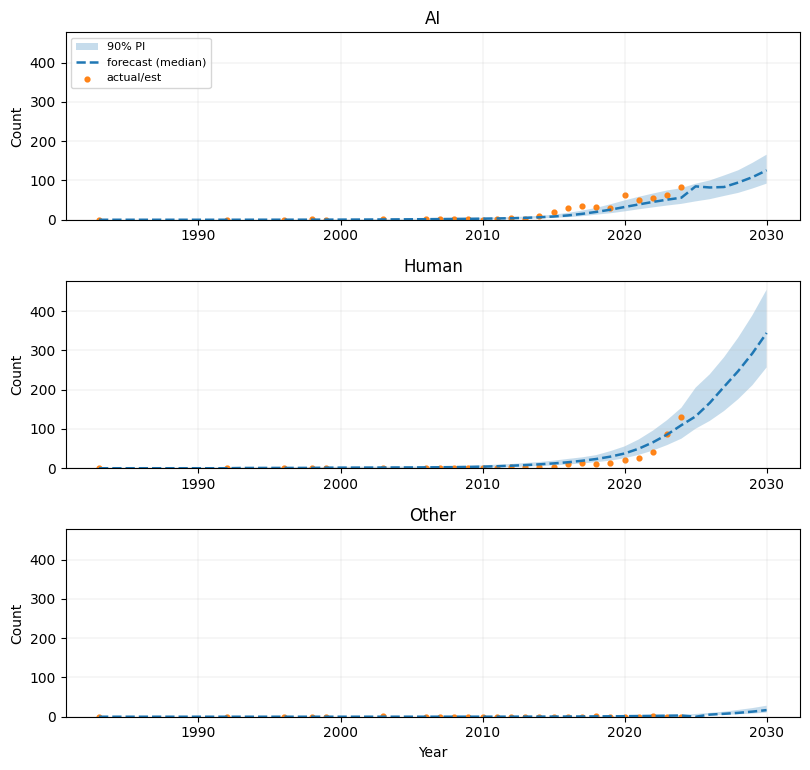

In [6]:
from forecast_helpers import ForecastConfig, forecast_by_category, plot_total_panel, plot_category_panels

cfg = ForecastConfig(YTD_YEAR=2025)
res_rd = forecast_by_category(merged_df, date_col="date", cat_col="Entity", config=cfg)
plot_total_panel(res_rd)
plot_category_panels(res_rd)